In [69]:
import tellurium as te
from urllib.request import urlopen
%matplotlib inline

# Roadrunner Methoden

## Query an antimony model from model db's:
Load the "Repressilator". Therefore use urlopen() and the methods read().decode('utf-8').

The URL for the repressilator reads:
http://antimony.sourceforge.net/examples/biomodels/BIOMD0000000012.txt

*Elowitz, M. B., & Leibler, S. (2000). A synthetic oscillatory network of transcriptional regulators. Nature, 403(6767), 335-338.*

In [70]:
Repressilator = urlopen('http://antimony.sourceforge.net/examples/biomodels/BIOMD0000000012.txt').read().decode('utf-8')
print(Repressilator)

// Created by libAntimony v2.8.0
model *BIOMD0000000012()

  // Compartments and Species:
  compartment cell;
  substanceOnly species PX in cell, PY in cell, PZ in cell, X in cell, Y in cell;
  substanceOnly species Z in cell;

  // Assignment Rules:
  beta := tau_mRNA/tau_prot;
  alpha0 := (a0_tr*eff*tau_prot)/(ln(2)*KM);
  a0_tr := ps_0*60;
  alpha := (a_tr*eff*tau_prot)/(ln(2)*KM);
  a_tr := (ps_a - ps_0)*60;
  t_ave := tau_mRNA/ln(2);
  kd_mRNA := ln(2)/tau_mRNA;
  kd_prot := ln(2)/tau_prot;
  k_tl := eff/t_ave;

  // Reactions:
  Reaction1: X => ; kd_mRNA*X;
  Reaction2: Y => ; kd_mRNA*Y;
  Reaction3: Z => ; kd_mRNA*Z;
  Reaction4:  => PX; k_tl*X;
  Reaction5:  => PY; k_tl*Y;
  Reaction6:  => PZ; k_tl*Z;
  Reaction7: PX => ; kd_prot*PX;
  Reaction8: PY => ; kd_prot*PY;
  Reaction9: PZ => ; kd_prot*PZ;
  Reaction10:  => X; a0_tr + (a_tr*KM^n)/(KM^n + PZ^n);
  Reaction11:  => Y; a0_tr + (a_tr*KM^n)/(KM^n + PX^n);
  Reaction12:  => Z; a0_tr + (a_tr*KM^n)/(KM^n + PY^n);

  // Species 

By loading a model you similarly generate a roadrunner object. Use loada() from tellurium.

In [71]:
rr = te.loada(Repressilator)

The following section illustrates several methods of roadrunner.
For example you can print a model in different formats such as antimony or SBML. For this use getAntimony() or getSBML().

In [72]:
print(rr.getAntimony())

// Created by libAntimony v2.9.4
model *BIOMD0000000012()

  // Compartments and Species:
  compartment cell;
  substanceOnly species PX in cell, PY in cell, PZ in cell, X in cell, Y in cell;
  substanceOnly species Z in cell;

  // Assignment Rules:
  beta := tau_mRNA/tau_prot;
  alpha0 := a0_tr*eff*tau_prot/(ln(2)*KM);
  a0_tr := ps_0*60;
  alpha := a_tr*eff*tau_prot/(ln(2)*KM);
  a_tr := (ps_a - ps_0)*60;
  t_ave := tau_mRNA/ln(2);
  kd_mRNA := ln(2)/tau_mRNA;
  kd_prot := ln(2)/tau_prot;
  k_tl := eff/t_ave;

  // Reactions:
  Reaction1: X => ; kd_mRNA*X;
  Reaction2: Y => ; kd_mRNA*Y;
  Reaction3: Z => ; kd_mRNA*Z;
  Reaction4:  => PX; k_tl*X;
  Reaction5:  => PY; k_tl*Y;
  Reaction6:  => PZ; k_tl*Z;
  Reaction7: PX => ; kd_prot*PX;
  Reaction8: PY => ; kd_prot*PY;
  Reaction9: PZ => ; kd_prot*PZ;
  Reaction10:  => X; a0_tr + a_tr*KM^n/(KM^n + PZ^n);
  Reaction11:  => Y; a0_tr + a_tr*KM^n/(KM^n + PX^n);
  Reaction12:  => Z; a0_tr + a_tr*KM^n/(KM^n + PY^n);

  // Species initializa

In [2]:
#print(rr.getSBML())

## Solver Methoden

Attention: resetToOrigin() resets the model somewhat similar to to loada(). But integrator settings are not affected by this. Hence, always use te.loada() for a hard reset!

Use getIntegrator() to display the solver algorithm and solver settings.

In [73]:
rr = te.loada(Repressilator)
print(rr.getIntegrator())

< roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false



Change the solver method from 'CVODE' to 'rk45' and print the settings again. 
You may notice the default parameters are solver specific.
Use methods setIntegrator() and getIntegrator().

In [74]:
rr = te.loada(Repressilator)
rr.setIntegrator('rk45')
print(rr.getIntegrator())

< roadrunner.Integrator() >
  name: rk45
  settings:
      variable_step_size: true
       minimum_time_step: 0.000000000001
       maximum_time_step: 1
                 epsilon: 0.000000000001



For example, use 'CVODE' and plot the model trajectories for different values for the 'relative_tolerance'-parameter.

Change the solver parameters via roadrunner.getIntegrator().setValue().

In [78]:
rr = te.loada(Repressilator)
rr.getIntegrator().setValue('relative_tolerance',1)
rr.simulate(0,1000,1000)
rr.plot()

## Steady-State Analysis

In [80]:
rr = te.loada(Repressilator)

print(rr.model.getGlobalParameterIds())
rr.model.setGlobalParameterValues([6],[1])
print(rr.model.getGlobalParameterValues())
rr.reset()
rr.simulate(0,1000,1000)
rr.plot()

rr.conservedMoietyAnalysis = True
rr.model.setGlobalParameterValues([6],[1])
print(rr.model.getGlobalParameterValues())


print('Convergence estimator:', rr.steadyState())
print(rr.steadyStateSelections)
print(rr.getSteadyStateValues())

['tau_mRNA', 'tau_prot', 'eff', 'KM', 'ps_0', 'ps_a', 'n', 'beta', 'alpha0', 'a0_tr', 'alpha', 'a_tr', 't_ave', 'kd_mRNA', 'kd_prot', 'k_tl']
[2.00000000e+00 1.00000000e+01 2.00000000e+01 4.00000000e+01
 5.00000000e-04 5.00000000e-01 1.00000000e+00 2.00000000e-01
 2.16404256e-01 3.00000000e-02 2.16187852e+02 2.99700000e+01
 2.88539008e+00 3.46573590e-01 6.93147181e-02 6.93147181e+00]


[2.00000000e+00 1.00000000e+01 2.00000000e+01 4.00000000e+01
 5.00000000e-04 5.00000000e-01 1.00000000e+00 2.00000000e-01
 2.16404256e-01 3.00000000e-02 2.16187852e+02 2.99700000e+01
 2.88539008e+00 3.46573590e-01 6.93147181e-02 6.93147181e+00]
Convergence estimator: 1.181171963772573e-07
['[PX]', '[PY]', '[PZ]', '[X]', '[Y]', '[Z]']
[572.96415158 572.96415158 572.96415158   5.72964152   5.72964152
   5.72964152]


## Control Analysis

In [82]:
rr = te.loada(Repressilator)
rr.conservedMoietyAnalysis = True
#print(rr.getAntimony())
print('Control coef.:',rr.getCC('Reaction10','n'))
print('Control coef.:',rr.getCC('X','n'))
print('Elasticiy coef.:',rr.getEE('Reaction10','PZ'))

Control coef.: -0.032516447220156626
Control coef.: -1.1721672329544974
Elasticiy coef.: -1.876229798902059


# Roadrunner and your model as an object in Python

From loading a model with loada() an instance of roadrunner is generated.
Additionally, the roadrunner object contains a the model as a python-object. 
Hence, there are i) specific methods for that .model object but also the content of the model can be manipulated.
Try it out!

In [83]:
rr = te.loada(Repressilator)
print(type(rr))
print(type(rr.model))

<class 'tellurium.roadrunner.extended_roadrunner.ExtendedRoadRunner'>
<class 'roadrunner.roadrunner.ExecutableModel'>


## Example - Parameterscan:

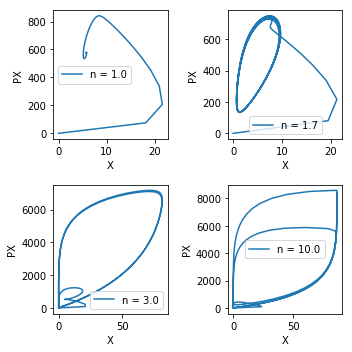

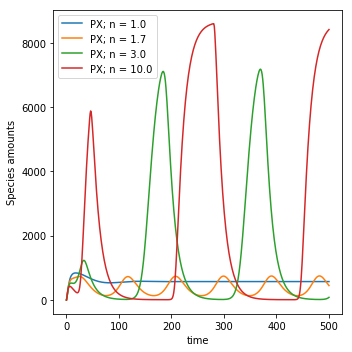

In [84]:
import matplotlib.pyplot as plt
import numpy as np

fig_phase = plt.figure(figsize=(5,5))

rr = te.loada(Repressilator)
for l,i in enumerate([1.0,1.7,3.0,10.]):
    
    fig_phase.add_subplot(2,2,l+1)
    
    rr.n = i
    rr.reset()
    result = rr.simulate(0,500,500,selections=['time','X','PX'])

    plt.plot(result['X'],result['PX'],label='n = %s' %i)
    
    plt.xlabel('X')
    plt.ylabel('PX')
    plt.legend() 

plt.tight_layout()

fig_timecourse= plt.figure(figsize=(5,5))

rr = te.loada(Repressilator)
for l,i in enumerate([1.0,1.7,3.0,10.]):
    
    rr.n = i
    rr.reset()
    result = rr.simulate(0,500,500,selections=['time','X','PX'])

    plt.plot(result['time'],result['PX'],label='PX; n = %s' %i)
    
    plt.xlabel('time')
    plt.ylabel('Species amounts')
    plt.legend() 
    
    
    
plt.tight_layout()

## Example - (Initial value)-scan:


['init(PX)', 'init(PY)', 'init(PZ)', 'init(X)', 'init(Y)', 'init(Z)']
[ 0.  0.  0.  0. 20.  0.]


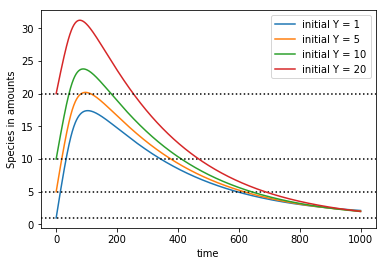

In [87]:
import matplotlib.pyplot as plt
import numpy as np

rr = te.loada(Repressilator)
print(rr.model.getFloatingSpeciesInitAmountIds())
print(rr.model.getFloatingSpeciesInitAmounts())

for l,i in enumerate([1,5,10,20]):
    
    # There are many possibilites to implement this:
    # First - wrong  
    #rr.Y=i

    # Second - wrong
    #rr.Y=i
    #rr.reset()
    
    # Third - correct, but there are more possibilites...
    rr.model["init(Y)"] = i
    rr.reset()    
    
   
    result = rr.simulate(0,10,1000,selections=['Y','PY'])
    
    #plt.plot(result[:,0],result['PY'],label='n = %s' %i)
    plt.plot(result['Y'],label='initial Y = %s' %i)
    plt.xlabel('time')
    plt.ylabel('Species in amounts')
    plt.axhline(y=i,linestyle = ':',color='black')
    plt.legend()
    